In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [62]:
train_df.shape

(60000, 785)

In [63]:
test_df.shape

(10000, 785)

In [64]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [65]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [66]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [67]:
X_train = train_df.iloc[:,1:].to_numpy()
X_train = X_train.reshape([-1,28,28,1])
X_train = X_train / 255

In [68]:
Y_train = train_df.iloc[:,0].to_numpy()

In [69]:
X_test = test_df.iloc[:,1:].to_numpy()
X_test = X_test.reshape([-1,28,28,1])
X_test = X_test / 255

In [70]:
Y_test = test_df.iloc[:,0].to_numpy()

<function matplotlib.pyplot.show(close=None, block=None)>

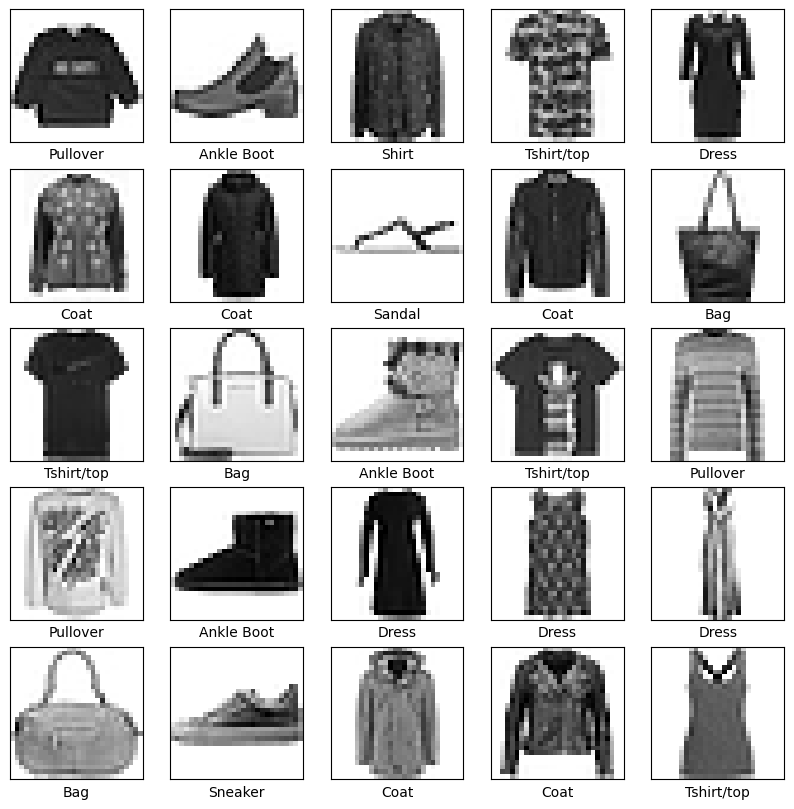

In [71]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [73]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       346,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.fit(X_train, Y_train, epochs = 50, batch_size = 1200, validation_split = 0.05)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.5897 - loss: 1.2672 - val_accuracy: 0.8257 - val_loss: 0.5117
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.8328 - loss: 0.4772 - val_accuracy: 0.8533 - val_loss: 0.4205
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.8574 - loss: 0.4105 - val_accuracy: 0.8680 - val_loss: 0.3753
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.8715 - loss: 0.3682 - val_accuracy: 0.8773 - val_loss: 0.3534
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.8778 - loss: 0.3466 - val_accuracy: 0.8840 - val_loss: 0.3340
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.8856 - loss: 0.3276 - val_accuracy: 0.8850 - val_loss: 0.3296
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.8877 - loss: 0.3160 - val_accuracy: 0.8897 - val_loss: 0.3212
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.8983 - loss: 0.2944 - val_accuracy: 0.

In [75]:
evaluation = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9174 - loss: 0.2305


In [76]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.9222999811172485


In [77]:
Y_probas = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [78]:
# Y_pred = Y_probas.argmax(axis = -1)

In [79]:
Y_pred

array([0, 1, 2, ..., 8, 8, 1])

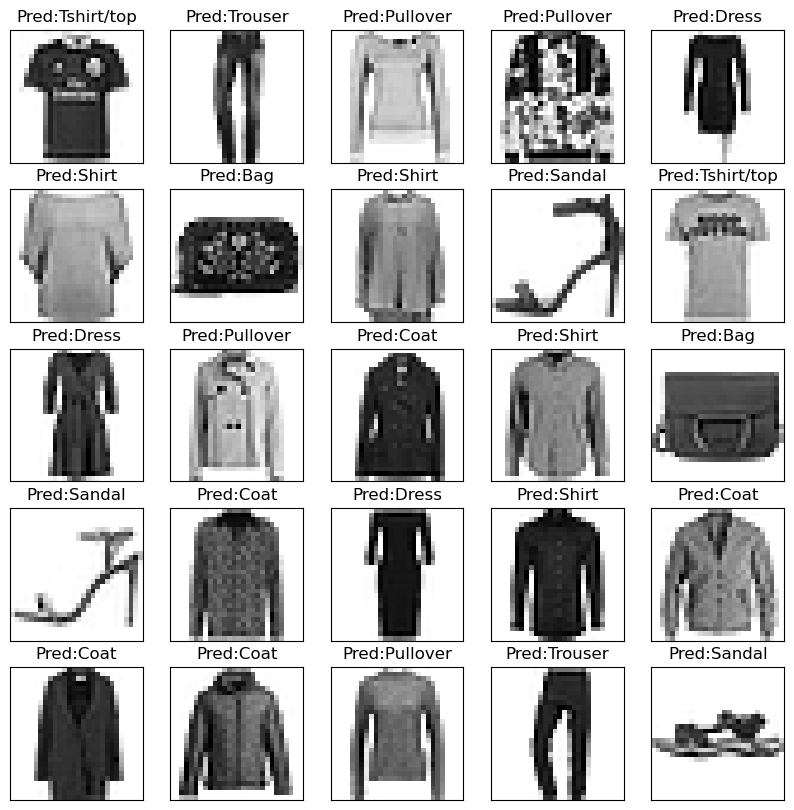

In [80]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.title(f"Pred:{class_names[Y_pred[i]]}")
plt.show()

In [81]:
from sklearn.metrics import classification_report

In [82]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(Y_test, Y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.84      0.88      0.86      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.92      0.81      0.86      1000
     class 3       0.93      0.93      0.93      1000
     class 4       0.84      0.91      0.88      1000
     class 5       0.97      0.98      0.98      1000
     class 6       0.76      0.75      0.75      1000
     class 7       0.97      0.95      0.96      1000
     class 8       0.99      0.98      0.98      1000
     class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

